<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge-Explanation" data-toc-modified-id="Challenge-Explanation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge Explanation</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Reviewing-Training-Labels" data-toc-modified-id="Reviewing-Training-Labels-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reviewing Training Labels</a></span></li><li><span><a href="#Reviewing-the-Training-Features" data-toc-modified-id="Reviewing-the-Training-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reviewing the Training Features</a></span><ul class="toc-item"><li><span><a href="#Reviewing-the-Numerical-Features" data-toc-modified-id="Reviewing-the-Numerical-Features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Reviewing the Numerical Features</a></span><ul class="toc-item"><li><span><a href="#amount_tsh" data-toc-modified-id="amount_tsh-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>amount_tsh</a></span></li><li><span><a href="#gps_height" data-toc-modified-id="gps_height-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>gps_height</a></span></li><li><span><a href="#num_private" data-toc-modified-id="num_private-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>num_private</a></span></li><li><span><a href="#population" data-toc-modified-id="population-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>population</a></span></li><li><span><a href="#latitude-and-longitude" data-toc-modified-id="latitude-and-longitude-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>latitude and longitude</a></span></li><li><span><a href="#construction_year" data-toc-modified-id="construction_year-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>construction_year</a></span></li></ul></li><li><span><a href="#Reviewing-the-Categorical-Features" data-toc-modified-id="Reviewing-the-Categorical-Features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Reviewing the Categorical Features</a></span><ul class="toc-item"><li><span><a href="#Individual-Categorical-Features" data-toc-modified-id="Individual-Categorical-Features-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Individual Categorical Features</a></span></li><li><span><a href="#Location-Features" data-toc-modified-id="Location-Features-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Location Features</a></span></li><li><span><a href="#Management-Features" data-toc-modified-id="Management-Features-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Management Features</a></span></li><li><span><a href="#Extraction-Features" data-toc-modified-id="Extraction-Features-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Extraction Features</a></span></li><li><span><a href="#Source-Features" data-toc-modified-id="Source-Features-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Source Features</a></span></li><li><span><a href="#Payment-Features" data-toc-modified-id="Payment-Features-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Payment Features</a></span></li><li><span><a href="#Quality-Features" data-toc-modified-id="Quality-Features-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>Quality Features</a></span></li><li><span><a href="#Quantity-Features" data-toc-modified-id="Quantity-Features-4.2.8"><span class="toc-item-num">4.2.8&nbsp;&nbsp;</span>Quantity Features</a></span></li><li><span><a href="#Waterpoint-Type-Features" data-toc-modified-id="Waterpoint-Type-Features-4.2.9"><span class="toc-item-num">4.2.9&nbsp;&nbsp;</span>Waterpoint Type Features</a></span></li></ul></li><li><span><a href="#Comments-on-Missing-Data-and-Handling" data-toc-modified-id="Comments-on-Missing-Data-and-Handling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Comments on Missing Data and Handling</a></span></li></ul></li><li><span><a href="#Reviewing-the-Testing-Set" data-toc-modified-id="Reviewing-the-Testing-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reviewing the Testing Set</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Pump It Up Challenge

## Challenge Explanation

## Data 

In [1]:
# %load ../Imports.py
#Imports
##General
import pandas as pd
import numpy as np

##Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Default Settings
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
#Training Data
X_train = pd.read_csv("Data/Raw/Train.csv")
y_train = pd.read_csv("Data/Raw/Train_Labels.csv")
merged_df = pd.merge(X_train, y_train, on = 'id')

#Test Data
X_test = pd.read_csv("Data/Raw/Test.csv")

## Reviewing Training Labels

In [3]:
y_train.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
y_train.isna().sum()

id              0
status_group    0
dtype: int64

In [5]:
txt = '{percent}% of the labels are functional.'
percent = sum(y_train['status_group'] == 'functional')/y_train.shape[0]*100
print(txt.format(percent = percent))

54.3080808080808% of the labels are functional.


In [6]:
txt = '{percent: .2f}% of the labels are non-functional.'
percent = sum(y_train['status_group'] == 'non functional')/y_train.shape[0]*100
print(txt.format(percent = percent))

 38.42% of the labels are non-functional.


In [7]:
txt = '{percent: .2f}% of the labels are functional, but in need of repair.'
percent = sum(y_train['status_group'] == 'functional needs repair')/y_train.shape[0]*100
print(txt.format(percent = percent))

 7.27% of the labels are functional, but in need of repair.


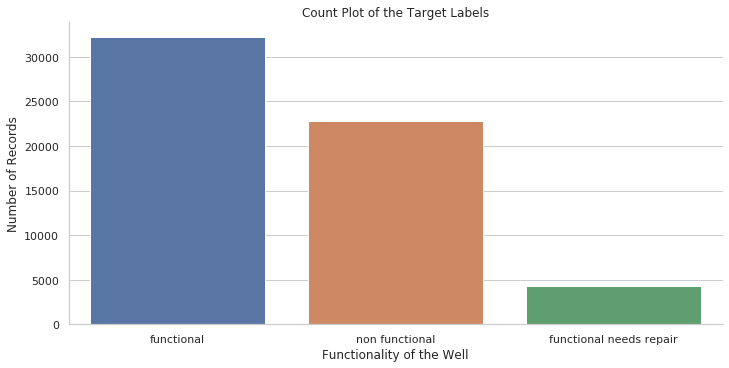

In [106]:
sns.catplot(x = 'status_group', kind = 'count', data = y_train, aspect = 2)
plt.title("Count Plot of the Target Labels")
plt.ylabel("Number of Records")
plt.xlabel("Functionality of the Well")
plt.savefig("Images/CountPlotTargetLabels.png")

## Reviewing the Training Features

In [9]:
X_train.shape

(59400, 40)

In [10]:
pd.set_option('display.max_columns', 40)
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [11]:
#X_train.dtypes

**Date_recorded**

The `date_recorded` feature was parsed as an object, so I'll convert this to `datetime` below, and review the dates.

In [12]:
X_train.date_recorded = pd.to_datetime(X_train.date_recorded)

In [13]:
X_train.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

**Missing Values**

In reviewing the number of missing records below, it is clear that the only features given a specific NaN value are the categorical features. All numerical features have simply been given the 0 value to mark any missing information.

In [14]:
X_train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

With regard to the categorical features, `scheme_name` is almost 50% missing, by far the greatest percentage in the categorical features. Since `scheme_name` refers to the specific name of who manages the maintenance of the well, this will be notably difficult to fill. Tanzania is highly decentralized when it comes to their water management, so even within highly granular locations, the differences in the scheme name can be unpredictable.

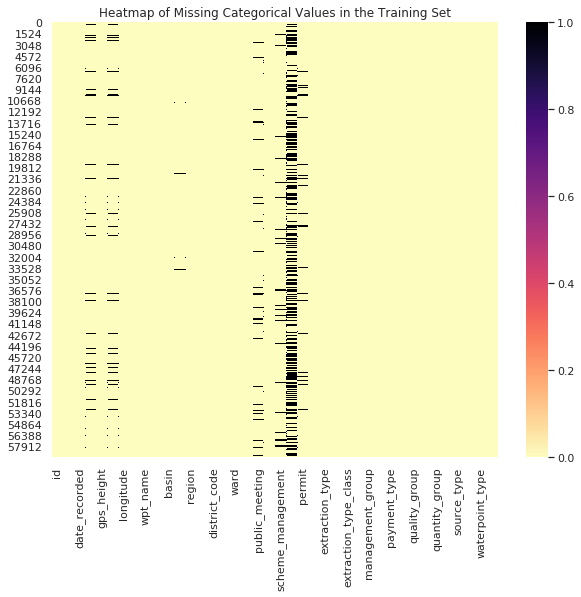

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.isna(), cmap = 'magma_r')
plt.title("Heatmap of Missing Categorical Values in the Training Set")
plt.savefig("Images/CategoricalMissings_Heatmap.png")

### Reviewing the Numerical Features

In [16]:
#Creating lists of the categorical and numerical features
train_num = []
train_cat = []
for feat in X_train.dtypes.index:
    if X_train[feat].dtype == "int64" or X_train[feat].dtype == "float64":
        train_num.append(feat)
    elif X_train[feat].dtype == "object":
        train_cat.append(feat)

In [17]:
X_train[train_num].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


There are a couple of variables in the "numeric" set which are clearly coded categorical variables. These are,
+ region_code
+ district_code

For the variables that are truly numeric, 0 has been used for the missing value flag. It is also highly likely that multiple of these features take on 0 as a valid observation. When I move on to data imputation, I'll most likely fill all missing values as if they are flags.

#### amount_tsh
This feature refers to the amount of water available to the well.

Lets begin by reviewing the potential missing values in the data set, then we can more closely examine the relationship this feature has with the target, and perhaps other features as well. This will be the methodology for all feature review.

In [18]:
sum(X_train['amount_tsh'] == 0)

41639

In [19]:
txt = "{percent: .2f}% of the 'amount_tsh' observations are missing or 0."
percent = sum(X_train['amount_tsh'] == 0)/X_train.shape[0]*100
print(txt.format(percent = percent))

 70.10% of the 'amount_tsh' observations are missing or 0.


In [20]:
#Descriptives including the 0 values
X_train['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

An incredibly high number of the observations are marked as having no available water in the well. Although there may be many wells which have no water available to them, I highly doubt that it's truly 70% of the observed wells.

Additionally, The maximum value seen in the descriptives above is somewhat worrisome. I won't be able to fill these values based on the mean of the entire data set, as I believe there may be a handful of high outliers which would strongly effect the mean after I remove the zero values.

In [21]:
#Descriptives grouped over regions
#Includes zero values
X_train['amount_tsh'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,3350.0,360.923881,2274.915820,0.0,0.0,0.0,10.0,20000.0
Dar es Salaam,805.0,236.706832,2612.250698,0.0,0.0,50.0,50.0,45000.0
Dodoma,2201.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Iringa,5294.0,1206.347752,4782.562343,0.0,0.0,500.0,1000.0,117000.0
Kagera,3316.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Kigoma,2816.0,347.658026,851.803578,0.0,0.0,150.0,300.0,26000.0
Kilimanjaro,4379.0,256.826821,2184.879625,0.0,0.0,0.0,20.0,120000.0
Lindi,1546.0,28.405563,171.470406,0.0,0.0,0.0,20.0,5400.0
Manyara,1583.0,262.463677,1675.603743,0.0,0.0,0.0,20.0,50000.0


Although I'm glad to be able to pull more region specific mean values, and am not immediately surprised by the variance from region to region, I do notice something much more worrying. There are 4 regions in the above grouped descriptives which are exclusively 0, ie they have no observations for the entirety of the data.

In [115]:
print("There are {} observations in the training data, in the four regions shown above, which have only 0 observations.".format(len(X_train[X_train['region'].isin(['Dodoma', 'Tabora', 'Mbeya', 'Kagera'])])))

There are 12115 observations in the training data, in the four regions shown above, which have only 0 observations.


In [117]:
print("There are {} observations in the testing data in these four all 0 regions.".format(len(X_test[X_test['region'].isin(['Dodoma', 'Tabora', 'Mbeya', 'Kagera'])])))

There are 3062 observations in the testing data in these four all 0 regions.


In [24]:
merged_df[merged_df['amount_tsh'] > 0]['amount_tsh'].groupby(merged_df['status_group']).describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,12553.0,1186.740162,6166.283045,0.25,50.0,250.0,1000.0,350000.0
functional needs repair,1269.0,908.548463,3468.461671,6.00,100.0,300.0,600.0,100000.0
non functional,3939.0,715.495202,2592.025587,0.20,50.0,200.0,500.0,117000.0


In [25]:
#Descriptives grouped over regions
#Excludes zero values
X_train[X_train['amount_tsh'] > 0]['amount_tsh'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,915.0,1321.415301,4206.195290,5.0,10.0,20.0,50.0,20000.0
Dar es Salaam,535.0,356.166355,3198.669986,20.0,50.0,50.0,100.0,45000.0
Iringa,3442.0,1855.434340,5829.131050,20.0,500.0,1000.0,2000.0,117000.0
Kigoma,1497.0,653.977956,1079.273912,10.0,250.0,250.0,600.0,26000.0
Kilimanjaro,2025.0,555.380074,3187.448193,0.2,6.0,20.0,450.0,120000.0
Lindi,462.0,95.054113,303.627289,10.0,25.0,50.0,50.0,5400.0
Manyara,573.0,725.095986,2725.650147,2.0,20.0,50.0,100.0,50000.0
Mara,367.0,584.158038,3256.133649,10.0,50.0,100.0,500.0,60000.0
Morogoro,1965.0,428.380153,582.039633,10.0,200.0,300.0,500.0,15000.0


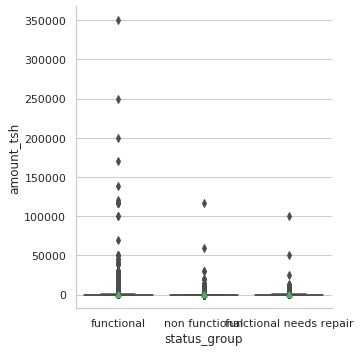

In [26]:
sns.catplot(x = 'status_group', y = 'amount_tsh', kind = 'box', showmeans = True, data = merged_df)

The 0 values notwithstanding, there are at least 4 clearly high values in the `amount_tsh` feature. I'll be adding these to a list of outliers to look at throughout the cleaning analysis.

In [27]:
X_train[X_train['amount_tsh'] > 150000]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
10812,41564,350000.0,2013-03-01,NaN,1558,NaN,34.840029,-4.542934,Mtinko Primary,0,Internal,Mlimani,Singida,13,2,Singida Rural,Mtinko,886,True,GeoData Consultants Ltd,VWC,K,NaN,1990,mono,mono,motorpump,vwc,user-group,pay annually,annually,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
22191,4128,250000.0,2011-03-04,Ded,285,WU,38.410852,-6.117538,Miono Dispensary,0,Wami / Ruvu,Kipera B,Pwani,6,1,Bagamoyo,Miono,80,True,GeoData Consultants Ltd,WUA,Chalinze wate,True,2003,ksb,submersible,submersible,parastatal,parastatal,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
22817,7860,200000.0,2011-08-08,Government Of Tanzania,98,Government,38.978067,-5.122702,Shuleni,0,Pangani,Pongwe Kaskazini,Tanga,4,4,Tanga,Pongwe,800,True,GeoData Consultants Ltd,VWC,Pongwe Water Supply,True,0,submersible,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
45067,70107,170000.0,2011-03-16,Owner Pingo C,127,WU,38.420467,-6.640090,Chuo Cha Ualimu,0,Wami / Ruvu,Madukani,Pwani,6,1,Bagamoyo,Chalinze,150,False,GeoData Consultants Ltd,WUA,Chalinze wate,True,2008,ksb,submersible,submersible,parastatal,parastatal,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe


In [28]:
outlier_index = [x for x in X_train[X_train['amount_tsh'] > 150000].index]

(0, 5000)

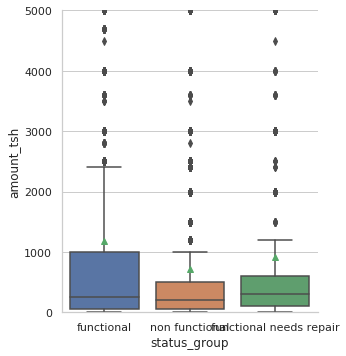

In [29]:
sns.catplot(x = 'status_group', y = 'amount_tsh', kind = 'box', showmeans = True, data = merged_df[(merged_df['amount_tsh'] > 0)])
plt.ylim(top = 5000, bottom = 0)

This is notably worrying, as more than 50% of the wells in the data set are listed as being functional, but well over 70% are marked as having no water available (or missing). Additionally, the spread of the non-zero observations is very large. I believe this feature is plagued by both a high rate of missing values, and by a handful of outliers.

I'm going to pursue two methods for now. First, I'll fill the `amount_tsh` values, using mean imputation over the most granular location information I can manage, and then model the data with these imputations. Then I'm going to drop the feature and model with out it. As much as I feel that this feature will be highly influential in predicting the functionality of the wells, the rate of missing values is simply to high. I strongly believe that any imputation method I use will erode the natural relationship between the functionality and the `amount_tsh` and there is very little chance, given the spread of the data, that I'll be able to capture this relationship through imputation.

#### gps_height
This feature refers to the elevation of the well, with respect to sea level, as acquired by gps readings.

In [121]:
print("{}% of the `gps_height` observations are missing or 0.".format(round(sum(X_train['gps_height'] == 0)/X_train.shape[0]*100, 2)))

34.41% of the `gps_height` observations are missing or 0.


Since the majority of Tanzania is not located at sea level, a large proportion of these 0 observations are definitely missing flags.

For the challenge, I'm only allowed to use data provided on the challenge website. If I was to imput this feature, I would use the [Jawgmaps Elevation API](https://www.jawg.io/docs/apidocs/elevation/) to generate the altitude of the well using the given latitude and longitude values in the data. I'd need to fill any missing lat/long values before creating my new elevation feature.

In [31]:
X_train['gps_height'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,3350.0,1401.144179,299.840596,594.0,1182.25,1401.0,1568.75,2770.0
Dar es Salaam,805.0,31.105590,38.325135,-63.0,5.00,29.0,60.00,151.0
Dodoma,2201.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Iringa,5294.0,1697.442010,357.935649,443.0,1517.00,1719.0,1945.00,2568.0
Kagera,3316.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Kigoma,2816.0,1235.562145,212.025702,768.0,1082.75,1274.0,1361.00,1760.0
Kilimanjaro,4379.0,1180.891528,332.544259,337.0,908.00,1241.0,1435.00,1888.0
Lindi,1546.0,212.866106,173.013974,-51.0,54.00,233.0,347.75,851.0
Manyara,1583.0,1426.077701,352.826622,561.0,1183.00,1474.0,1674.00,2253.0


Those same four regions are totally missing once again, and I suspect that they may be entirely missing for all numeric features.

#### num_private
I'm not actually certain what this feature refers to, as, after fully reviewing the data set and the data documentation provided by the competition, I haven't found any logical explanation for what this could be conveying. 
Additionally, if 0 is used a a missing flag, it's possible that a incredibly large amount of the observations are missing.
I'll most likely drop this from the working data before modeling.

In [123]:
print("{}% of the `num_private` observations are missing or 0.".format(round(sum(X_train['num_private'] == 0)/X_train.shape[0]*100, 2)))

98.73% of the `num_private` observations are missing or 0.


I have two issues with the `num_private` feature. First, more than 98% of the observations are missing or 0, and I don't have an understanding of what it would mean for this feature to take on a zero value. Second, there is no description of this feature in the provided data information. Due to the incredibly high rate of missing values in this feature, I'll be dropping it from the working set.

#### population
This feature lists the population found around the well.

In [34]:
sum(X_train['population'] == 0)

21381

In [35]:
txt = "{percent: .2f}% of the 'population' observations are missing or 0."
percent = sum(X_train['population'] == 0)/X_train.shape[0]*100
print(txt.format(percent = percent))

 35.99% of the 'population' observations are missing or 0.


In [36]:
X_train['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

Again we see a very large number of 0 or missing values, and then a notably high maximum value. I'll want to review this feature for outliers as well.

In [37]:
#X_train[X_train['population'] == 0][train_cat].describe()
#X_train[X_train['population'] == 0][train_num].describe()

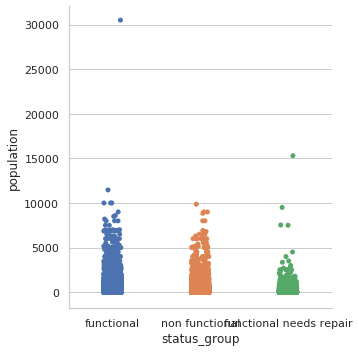

In [286]:
sns.catplot(x = 'status_group', y = 'population', data = merged_df)

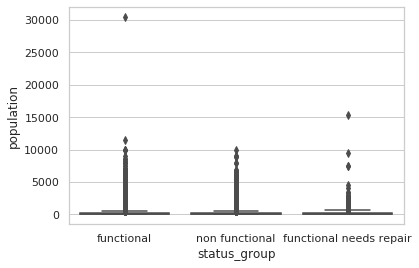

In [39]:
sns.boxplot(x = 'status_group', y = 'population', data = merged_df)

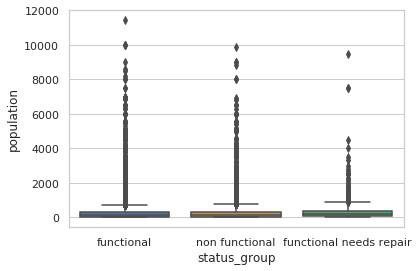

In [40]:
sns.boxplot(x = 'status_group', y = 'population', data = merged_df[(merged_df['population'] < 12000) & (merged_df['population'] > 0)])

In [41]:
X_train[X_train['population'] > 12000]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
14308,49354,0.0,2013-02-21,Water Board,1084,Water board,36.386050,-4.787678,Mashineni,0,Internal,Engarakashi,Manyara,21,5,Kiteto,Makame,15300,True,GeoData Consultants Ltd,VWC,Water board,False,1983,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
30537,12169,0.0,2011-03-12,Government Of Tanzania,184,DWE,38.783756,-5.181904,Mkwajuni,0,Pangani,Mkwajuni,Tanga,4,3,Muheza,Masuguru,30500,True,GeoData Consultants Ltd,VWC,NaN,False,2008,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [42]:
for x in X_train[X_train['population'] > 12000].index:
    outlier_index.append(x)

There are two incredibly high population values. I'll be marking these values and reviewing them when I go to look at outliers throughout the data set. I believe I'll most likely drop these two point before modeling, especially if I find that they represent additional inconsistencies.

In [43]:
X_train['population'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,3350.0,262.239104,442.690742,0.0,120.0,150.0,253.00,9500.0
Dar es Salaam,805.0,240.843478,534.198421,1.0,90.0,150.0,250.00,9865.0
Dodoma,2201.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Iringa,5294.0,94.304307,190.406908,0.0,1.0,40.0,85.00,3072.0
Kagera,3316.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Kigoma,2816.0,500.241832,590.075269,0.0,225.0,360.0,540.00,8500.0
Kilimanjaro,4379.0,105.747888,294.260177,1.0,1.0,40.0,120.00,8000.0
Lindi,1546.0,364.404916,400.230048,1.0,200.0,300.0,422.25,5050.0
Manyara,1583.0,317.778269,582.243701,1.0,150.0,213.0,324.50,15300.0


In [44]:
X_train['population'].groupby(X_train['region_code']).describe()

,count,mean,std,min,25%,50%,75%,max
region_code,,,,,,,,
1,2201.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
2,3024.0,245.004299,428.327436,0.0,120.0,150.0,250.00,9500.0
3,4379.0,105.747888,294.260177,1.0,1.0,40.0,120.00,8000.0
4,2513.0,239.775965,790.095378,1.0,1.0,70.0,250.00,30500.0
5,4040.0,268.815594,342.339200,1.0,80.0,200.0,300.00,5000.0
6,1609.0,248.344313,660.116198,1.0,20.0,50.0,200.00,11463.0
7,805.0,240.843478,534.198421,1.0,90.0,150.0,250.00,9865.0
8,300.0,346.116667,423.693581,1.0,200.0,270.0,381.25,5050.0
9,390.0,248.353846,269.167598,1.0,1.0,217.5,408.75,2238.0


Again those same four regions are entirely devoid of information. They represent far too large of a percentage of the data to be dropped, but will prove to be the most difficult when filling them. To assist with the filling of the `population` values, I'll be creating a dictionary of the population data as given by the 2012 Tanzania census, and will use the average (Calculated as `(Total Population of a given Ward)/(Number of Wells in the Ward)`) to fill the 0 values.

I'm also noticing a somewhat confusing relationship between region_code and the regions. I'm not sure how a region was assigned to a specific code, as there are a confusing number of levels to the `region_code` feature, and some which are representative of only one observation. I'll keep this feature in the data for modeling, to review its significance (using the ensemble methods I'm planning on using already), and then determine if it is useful to retain. I'll also create my own encoded version of the regions, based on my updated region information that I'll get from the above mentioned dictionary.

#### latitude and longitude
These two features describe the latitude and longitude, respectively, of the wells.

The the listed center values for Tanzania, on Google Maps, are 6.3690° S, 34.8888° E. Values for West and South in the data set are marked as negative values.

In [45]:
X_train['latitude'].mean()

-5.706032659626503

In [46]:
X_train['longitude'].mean()

34.07742669202832

In [47]:
sum(X_train['longitude'] == 0)

1812

In [48]:
sum(X_train['latitude'] ==0)

0

There are 1812 observations for which the longitude is 0, but Tanzania does not cross the equator. As such, there are no locations in the data set which would actually take on a value of 0. There are no values for latitude listed as 0, but I find it hard to believe that the longitudes are missing and the latitudes are not. There must be a different flag used for the latitude.

In [124]:
X_train[X_train['longitude'] == 0]['latitude'].head()#.groupby(X_train.subvillage).describe()

21    -2.000000e-08
53    -2.000000e-08
168   -2.000000e-08
177   -2.000000e-08
253   -2.000000e-08
Name: latitude, dtype: float64

In [50]:
sum(X_train['latitude'] == -2.000000e-08)

1812

The value `-2.000000e-08` is used as the latitude missing flag in this data.

In [51]:
X_train[X_train['longitude'] == 0].groupby(X_train.region).describe()

id                                                       \
            count          mean           std    min      25%      50%   
region                                                                   
Mwanza      807.0  38365.079306  21801.929635   15.0  18536.5  40272.0   
Shinyanga  1005.0  36606.739303  21073.965942  194.0  18436.0  35776.0   

                            amount_tsh                                     \
               75%      max      count mean  std  min  25%  50%  75%  max   
region                                                                      
Mwanza     56729.5  74190.0      807.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Shinyanga  54378.0  74193.0     1005.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          gps_height                 ... district_code                 \
               count mean  std  min  ...           25%  50%  75%  max   
region                               ...                                
Mwanza         807.0  0.0  0.0  0.0  ...           2.0  6.0  6.0  6.0   
Shinyanga     1005.0  0.0  0.0  0.0  ...           1.0  1.0  1.0  4.0   

          population                                    construction_year  \
               count mean  std  min  25%  50%  75%  max             count   
region                                                                      
Mwanza         807.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0             807.0   
Shinyanga     1005.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            1005.0   

                                              
          mean  std  min  25%  50%  75%  max  
region                                        
Mwanza     0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Shinyanga  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 80 columns]

The only observations which do not have known latitude and longitudes are found in, exclusively, two regions:
+ Mwanza
+ Shinyanga

In [52]:
X_train[(X_train['region'] == 'Mwanza') & (X_train['latitude'] < -0.01) & (X_train['longitude'] > 0)].describe()[['latitude', 'longitude']]

,latitude,longitude
count,2295.000000,2295.000000
mean,-2.620502,33.091564
std,0.329898,0.329287
min,-3.424444,32.046458
25%,-2.847182,32.943112
50%,-2.634751,33.081836
75%,-2.476632,33.345810
max,-1.714486,33.756895


In [53]:
X_train[(X_train['region'] == 'Shinyanga')  & (X_train['latitude'] < -0.01) & (X_train['longitude'] > 0)].describe()[['latitude', 'longitude']]

,latitude,longitude
count,3977.000000,3977.000000
mean,-3.495696,33.240121
std,0.328573,0.765545
min,-4.381946,31.454726
25%,-3.768391,32.535525
50%,-3.499209,33.437223
75%,-3.229457,33.860597
max,-2.823028,34.758734


Although all the missing values are found in the above two regions, the regions do have some known observations. I can use this information to fill the regions based on the mean value.

It's worth noting at this point that, although I'll go into greater detail in the location sections, that many of the observations have been incorrectly assigned. For example, there exist many wards (equivalent to an American city) which are listed in the incorrect district (similar to an America county), and also many districts which are marked as being in the incorrect region (similar to an American state). I'll be correcting this for my analysis, which will mean that many of the above described missing values will actually be located in other regions or districts, and will take on the mean of the new and correct locations for their imputation value.

#### construction_year
This feature lists the year in which a specific well was constructed. Although included in the numeric features, this is a date [year].

Just like the numeric variables, the construction_year feature also takes on 0 as a flag for missing values. In this case though, perhaps obviously, there are no correct values listed at 0. I don't need to worry about filling a correctly observed 0 value.

In [54]:
txt = "{percent: .2f}% of the construction_year observations are missing."
percent = (sum(X_train['construction_year'] == 0)/X_train.shape[0])*100
print(txt.format(percent = percent))

 34.86% of the construction_year observations are missing.


In [55]:
X_train[X_train['construction_year'] == 0]['construction_year'].describe()['count']

20709.0

In [126]:
#Descriptives of the non-zero values
X_train[X_train['construction_year'] > 0]['construction_year'].describe()

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

Wells in the data set, with observed construction years, were built between 1960 and 2013. I need to be certain that if I fill this value, I only imput integer values.

In [57]:
X_train['construction_year'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,3350.0,1968.378806,245.060668,0.0,1995.0,2000.0,2008.0,2013.0
Dar es Salaam,805.0,1958.782609,288.091177,0.0,2000.0,2000.0,2010.0,2010.0
Dodoma,2201.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Iringa,5294.0,1857.084624,510.711422,0.0,1984.0,2000.0,2008.0,2011.0
Kagera,3316.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Kigoma,2816.0,1990.933949,119.364816,0.0,1990.0,2001.0,2007.0,2013.0
Kilimanjaro,4379.0,1980.585522,178.405958,0.0,1980.0,2002.0,2008.0,2013.0
Lindi,1546.0,1849.035576,519.566307,0.0,1980.0,1992.0,2007.0,2013.0
Manyara,1583.0,1985.672142,181.008620,0.0,1998.0,2004.0,2009.0,2013.0


Those same four regions are blank again.

Text(0.5, 0, 'Construction Year \n Wells in the data set were constructed bewteen 1960 and 2013.')

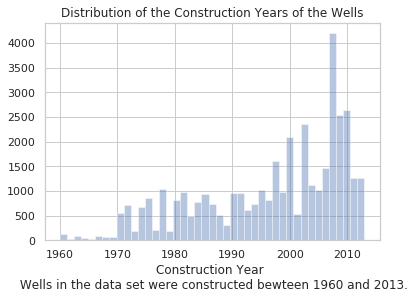

In [58]:
sns.distplot(X_train[X_train['construction_year'] > 0]['construction_year'], kde = False)
plt.title("Distribution of the Construction Years of the Wells")
plt.xlabel("Construction Year \n Wells in the data set were constructed bewteen 1960 and 2013.")

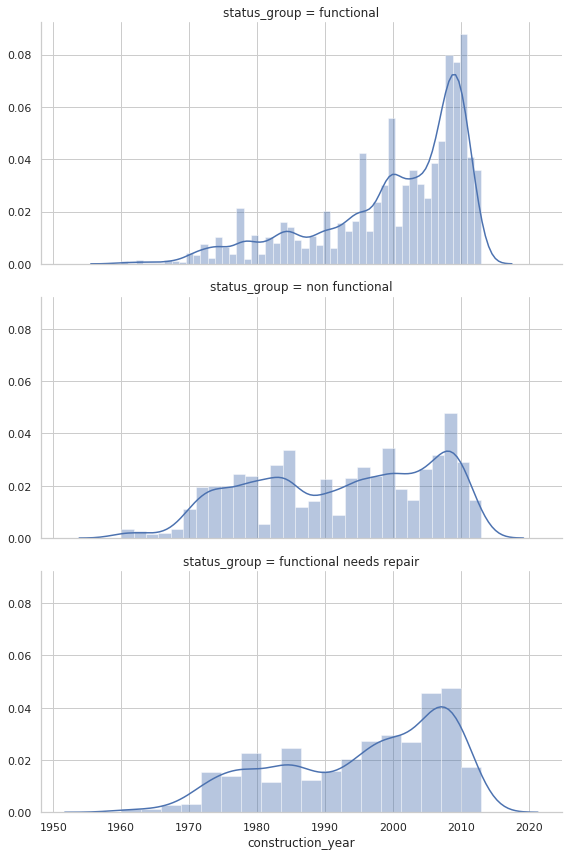

In [129]:
g = sns.FacetGrid(merged_df[merged_df['construction_year'] > 0], row="status_group", aspect = 2, height = 4)
g = g.map(sns.distplot, "construction_year")

There is a clear relationship between a well being functional and it being built more recently. I need to be careful when filling this value that I don't assign all missing values to the mean of the data set, as this will quite notably affect this relationship. I'll need to add noise to the imputations.

### Reviewing the Categorical Features

In [60]:
X_train[train_cat].describe()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


Just looking at this initial descriptive information, I have a few comments.  
First, there are multiple features with incredibly high numbers of levels, which will make them rather difficult, if not impossible, to use in modeling in their naive form. I'll review these to see if there is a logical way to collapse these, or if the information is captured by another feature such that I can simply remove the feature from the data set.  
Second, there are multiple features, as according to the data descriptive file provided for the competition, which are markers for similar information. These include multiple features describing the location information, 
+ subvillage
+ region
+ region_code
+ district_code
+ lga
+ ward  

features describing the extraction method for the well in question,
+ extraction_type
+ extraction_type_group
+ extraction_type_class  

features describing the management of the well,
+ management (how the well is managed)
+ management_group (how the well is managed)
+ scheme_management (who manages the well)
+ scheme_name (who manages the well)

features describing the source of the water for the well,
+ source
+ source_type
+ source_class  

and two features describing the cost, quality, quantity, and waterpoint type of the well
+ payment & payment_type
+ water_quality & quality_group
+ quantity & quantity_group
+ waterpoint_type & waterpoint_type_group

I'll analyze the categorical variables by group when available, paying special attention to those with notably high amounts of categories.

#### Individual Categorical Features
These features include all categorical features which cannot be grouped. These are,
+ funder
+ installer
+ wpt_name

**`funder` & `installer`**

In [61]:
X_train[['funder', 'installer']].describe()

,funder,installer
count,55765,55745
unique,1897,2145
top,Government Of Tanzania,DWE
freq,9084,17402


The first two categorical features of interest are `funder` and `installer`, with 1897 and 2145 unique values, respectively. These refer to who funded the installation of the well, and who installed the well. Although I believe that these two features may have a strong link to the functionality of the wells, when I conducted a more indepth examination of the features (seen below), I found many issues.  

The `installer` feature seems to be entered by hand with little to no regard for consistency when it comes to spelling, abbreviations, or language. Even the manner is which missing values were recorded has no standard; some missing values are marked with 0, others with the phrases "Unknown", "Not known", "Not kno", and "Uknown Installer", to provide simply a few examples.  
The `funder` feature is slightly less error-prone, but faces similar issues overall. For example, it appears that a few wells were funded by the Swedish government. These different wells are listed as being funded by:
+ Sweden
+ Swedish
+ Sweeden
+ Swidish

In [62]:
install_levels = X_train['installer'].drop_duplicates()
install_levels.sort_values(inplace = True)
len(install_levels)

2146

In [63]:
#for level in install_levels:
    #print(level)

Some groups into which I could collapse these, as I review them, are
+ Governments/Countries/Cities
    - Watch words: govern, ministry, country name, city name, council (concil), district, parliament, municipal, town, authority, village, community, central, department, embassy, world, bank, local, DWE (I suspect this to be an abbreviation for department of water and energy)
+ Religious foundations/organizations
    - Watch words: parish, mosque, church, mission, Muslim, Christian, temple, Islam, catholic, roman
+ Corporations
    - Watch words: 'co', construct, ltd, contract, tech, workers, company, builder, drill, install, group
+ Charity/Donation
    - Watch words: school, hospital, estate, project, institution, red cross, rotary, save, summit, aid, club, secondary

The problem being, I have no way of knowing that these groups will be comprised of parties following at all similar practices.

In [64]:
funder_levels = X_train['funder'].drop_duplicates()
funder_levels.sort_values(inplace = True)
len(funder_levels)

1898

In [65]:
#for level in funder_levels:
    #print(level)

**`wpt_name`**

In [66]:
X_train.wpt_name.describe()

count     59400
unique    37400
top        none
freq       3563
Name: wpt_name, dtype: object

With the highest number of unique values, the `wpt_name` feature is a list of the names of the water points. There are over 37,000 different names. As the name of the well is not likely to indicate much about its functionality, this feature will be dropped from the working data set.  

#### Location Features

These features mark the location of the individual wells. They are listed here in increasing levels of granularity.

**`subvillage`**

In [67]:
X_train.subvillage.describe()

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object

With the greatest number of unique values behind `wpt_name` (19,000+), the `subvillage` feature is a list of the names of the villages containing the wells. With its incredibly high number of levels, it is difficult to use this feature in modeling. As the location information is captured with less granularity at higher levels, I'll drop `subvillage` from the modeling data.

**`ward`**

In [78]:
X_train.ward.describe()

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object

`ward`, with just over 2000 unique values, provides information about which ward the well is found in in Tanzania. As I have multiple categorical features which provide less granular geographical information, and lat/long values, I'll most likely be dropping this from the modeling data set.

**`lga`**  
`lga` marks the district in which the well is found.

In [132]:
#Number of missing values
X_train['lga'].isna().sum()

0

There are no missing values in the `lga` feature, meaning it will need no imputation.

In [75]:
X_train.lga.describe()

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object

In [130]:
for thing in X_train['lga'][:5]:
    print(thing)

Ludewa
Serengeti
Simanjiro
Nanyumbu
Karagwe


Text(-3.8249999999999957, 0.5, 'Number of Records')

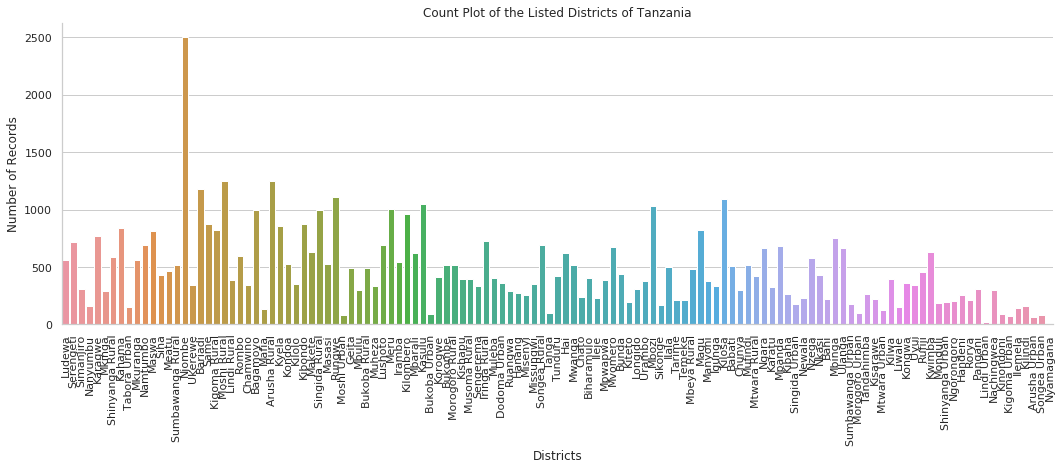

In [145]:
sns.catplot(x = 'lga', kind = 'count', data = X_train, aspect = 3)
plt.xticks(rotation = 90)
plt.title("Count Plot of the Listed Districts of Tanzania")
plt.xlabel("Districts")
plt.ylabel("Number of Records")

The `lga` feature has 125 unique levels, which is a much more acceptable number for modeling, as I will not unintentionally span the set by including it. This will feature will be included in the modeling data. This will be updated though, using my to-be-created dictionary of accurate region/district/ward divisions in Tanzania.

**`district_code`**

In [133]:
#District code descriptive information
X_train['district_code'].describe()

count    59400.000000
mean         5.629747
std          9.633649
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64

Although there are 125 listed districts in the `lga` feature, there are only 81 (0-80) different district codes. 

In [74]:
X_train['district_code'].groupby(X_train['lga']).describe()

,count,mean,std,min,25%,50%,75%,max
lga,,,,,,,,
Arusha Rural,1252.0,2.036741,0.188201,2.0,2.0,2.0,2.0,3.0
Arusha Urban,63.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
Babati,511.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Bagamoyo,997.0,1.013039,0.113499,1.0,1.0,1.0,1.0,2.0
Bahi,224.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
Bariadi,1177.0,1.007647,0.151330,1.0,1.0,1.0,1.0,4.0
Biharamulo,403.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
Bukoba Rural,487.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Bukoba Urban,88.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0


When grouping the `district_code` by the `lga` it becomes clear that one than one district code is often given to one level of `lga`. I'm not sure how this feature was determined on the district itself. I'll retain this in the modeling data set, but I will not be using this to actually locate the well for any geographical analysis.

**`region`**

In [68]:
X_train.region.describe()

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object

There are 21 different regions listed in this data set. I'm already aware of the fact that the regions are not listed as according to the most recent Tanzania census data, so the fact that this doesn't match then known 31 regions of Tanzania is not surprising to me.
I'll be updating these based on the census data, and then including this feature in the modeling data set.

Text(-3.8249999999999957, 0.5, 'Number of Records')

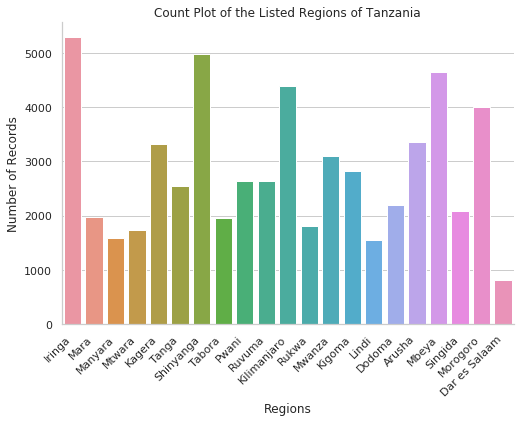

In [140]:
sns.catplot(x = 'region', kind = 'count', data = X_train, aspect = 1.5)
plt.xticks(rotation = 45, ha = "right")
plt.title("Count Plot of the Listed Regions of Tanzania")
plt.xlabel("Regions")
plt.ylabel("Number of Records")

**`region_code`**

In [71]:
X_train.region_code.describe()

count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64

In [148]:
len(X_train.region_code.unique())

27

As noted earlier in the analysis, the number of regions(21) does not match to the number of listed region codes (27). 

In [163]:
#X_train['region'].groupby(X_train['region_code']).describe()
X_train['region_code'].groupby(X_train['region']).describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Arusha,3350.0,4.140896,6.521423,2.0,2.0,2.0,2.0,24.0
Dar es Salaam,805.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0
Dodoma,2201.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Iringa,5294.0,11.000000,0.000000,11.0,11.0,11.0,11.0,11.0
Kagera,3316.0,18.000000,0.000000,18.0,18.0,18.0,18.0,18.0
Kigoma,2816.0,16.000000,0.000000,16.0,16.0,16.0,16.0,16.0
Kilimanjaro,4379.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
Lindi,1546.0,65.707633,28.672324,8.0,80.0,80.0,80.0,80.0
Manyara,1583.0,21.000000,0.000000,21.0,21.0,21.0,21.0,21.0


It does appear, from the above grouped object, that some of the regions which have multiple region codes have these due to typos (ie. Lindi is maarked with the region codes 8 and 80).

*Lindi*

In [152]:
print("{} observations have a region code of '8'.".format(X_train[X_train['region_code'] == 8].shape[0]))
print("{} observations have a region code of '80'.".format(X_train[X_train['region_code'] == 80].shape[0]))

300 observations have a region code of '8'.
1238 observations have a region code of '8'.


*Mtwara*

In [155]:
print("{} observations have a region code of '9'.".format(X_train[X_train['region_code'] == 9].shape[0]))
print("{} observations have a region code of '90'.".format(X_train[X_train['region_code'] == 90].shape[0]))
print("{} observations have a region code of '99'.".format(X_train[X_train['region_code'] == 99].shape[0]))

390 observations have a region code of '9'.
917 observations have a region code of '90'.
423 observations have a region code of '99'.


*Arusha*

In [156]:
print("{} observations have a region code of '2'.".format(X_train[X_train['region_code'] == 2].shape[0]))
print("{} observations have a region code of '24'.".format(X_train[X_train['region_code'] == 24].shape[0]))

3024 observations have a region code of '2'.
326 observations have a region code of '24'.


*Tanga*

In [158]:
print("{} observations have a region code of '4'.".format(X_train[X_train['region_code'] == 4].shape[0]))
print("{} observations have a region code of '5'.".format(X_train[X_train['region_code'] == 5].shape[0]))

2513 observations have a region code of '4'.
4040 observations have a region code of '5'.


*Mwanza*

In [159]:
print("{} observations have a region code of '17'.".format(X_train[X_train['region_code'] == 17].shape[0]))
print("{} observations have a region code of '19'.".format(X_train[X_train['region_code'] == 19].shape[0]))

5011 observations have a region code of '17'.
3047 observations have a region code of '19'.


*Pwani*

In [162]:
print("{} observations have a region code of '6'.".format(X_train[X_train['region_code'] == 6].shape[0]))
print("{} observations have a region code of '60'.".format(X_train[X_train['region_code'] == 60].shape[0]))
print("{} observation has a region code of '40'.".format(X_train[X_train['region_code'] == 40].shape[0]))

1609 observations have a region code of '6'.
1025 observations have a region code of '60'.
1 observation has a region code of '40'.


The rate at which the different region codes are observed are relatively high to indicate that that they are simply typos. I'll need to review these in Tableau before determining whether I should correct them to a single code. 

#### Management Features
These features refer to who manages or maintains the wells. Frequently these are highly regionally specific, due to the decentralization of water system management in Tanzania.

**`management`**  
This feature refers to how the well is managed.

In [79]:
X_train['management'].describe()

count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object

Text(-10.824999999999996, 0.5, 'Number of Records')

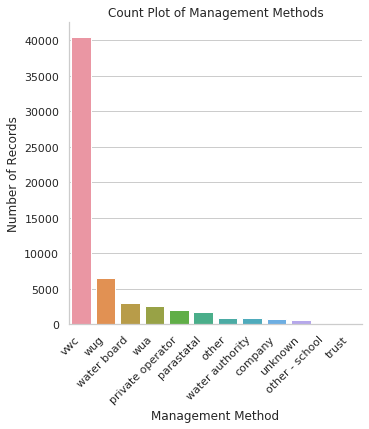

In [168]:
order = ["vwc", "wug", "water board", "wua", "private operator", "parastatal", "other", "water authority", "company", "unknown", "other - school", "trust"]
sns.catplot(x = 'management', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Count Plot of Management Methods")
plt.xlabel("Management Method")
plt.ylabel("Number of Records")

**`management_group`**  
This feature provides more generalized information about how the well is managed.

In [81]:
X_train['management_group'].describe()

count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

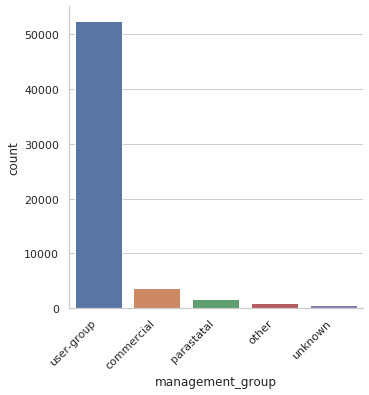

In [165]:
order = ["user-group", "commercial", "parastatal", "other", "unknown"]
sns.catplot(x = 'management_group', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

The majority of the wells are managed by those who use them.

Due to the imbalance in classes it may be useful to reclassify this as "user_group" and "Other".

**`scheme_management`**  
This feature describes who manages the well.

In [83]:
X_train['scheme_management'].describe()

count     55523
unique       12
top         VWC
freq      36793
Name: scheme_management, dtype: object

Text(-10.824999999999996, 0.5, 'Number of Records')

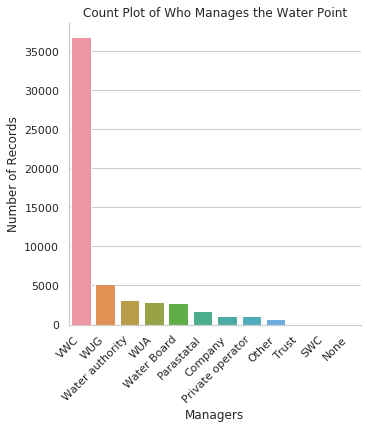

In [170]:
order = ["VWC", "WUG", "Water authority", "WUA", "Water Board", "Parastatal", "Company", "Private operator", "Other", "Trust", "SWC", "None"]
sns.catplot(x = 'scheme_management', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Count Plot of Who Manages the Water Point")
plt.xlabel("Managers")
plt.ylabel("Number of Records")

**`scheme_name`**
This feature records the name of the management group for the well.

In [85]:
X_train.scheme_name.describe()

count     31234
unique     2696
top           K
freq        682
Name: scheme_name, dtype: object

In [86]:
X_train[X_train['scheme_name'].notna()]['scheme_name'].head(n=15)

0                           Roman
2     Nyumba ya mungu pipe scheme
5                       Zingibali
13                     BL Bondeni
14                           None
16    wanging'ombe water supply s
17    wanging'ombe water supply s
19                         Makanj
20                         Kidabu
22    wanging'ombe water supply s
23                      Mashangwi
24             Quick wins Program
25                 Komaka mandaka
26         Sobodo Borehole Scheme
28          Kitukuni water supply
Name: scheme_name, dtype: object

With the third largest number of levels (2696 unique values) `scheme_name` describes who operates the waterpoint. This information is supposedly also available in `scheme_management` (which contains a much more reasonable 12 levels). As another feature provides similar information, and due to the fact that nearly half of the observations are missing, I'll be dropping scheme name from the working set as well. 

#### Extraction Features
These features describe how the water is extracted for the well. They are displayed here in decreasing order of granularity.

**`extraction_type`**  
This feature describes how the water is extracted for the well, with the greatest amount of granularity.

In [87]:
X_train['extraction_type'].describe()

count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

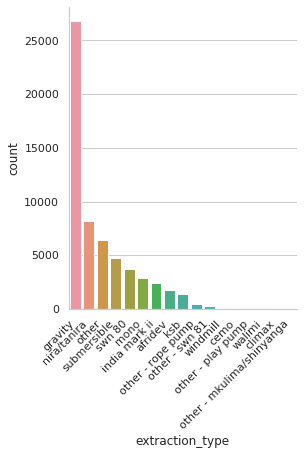

In [88]:
order = ['gravity', 'nira/tanira', 'other', 'submersible', 'swn 80', 'mono', 'india mark ii', 'afridev', 'ksb', 'other - rope pump', 'other - swn 81', 'windmill', 'cemo', 'other - play pump', 'walimi', 'climax', 'other - mkulima/shinyanga']
sns.catplot(x = 'extraction_type', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

**`extraction_type_group`**  
This feature also described the extraction method used for the well, with the second least amount of granularity.

In [89]:
X_train['extraction_type_group'].describe()

count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

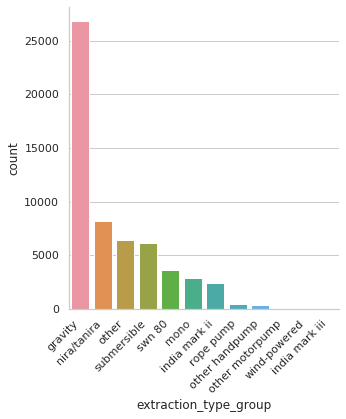

In [90]:
order = ['gravity', 'nira/tanira', 'other', 'submersible', 'swn 80', 'mono', 'india mark ii', 'rope pump', 'other handpump', 'other motorpump', 'wind-powered', 'india mark iii']
sns.catplot(x = 'extraction_type_group', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

**`extraction_type_class`**  
The final and least granular feature describing the extraction method for the well.

In [91]:
X_train['extraction_type_class'].describe()

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

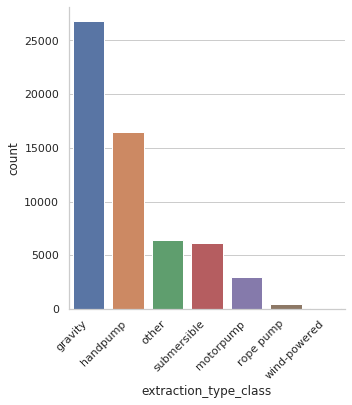

In [92]:
order = ['gravity', 'handpump', 'other', 'submersible', 'motorpump', 'rope pump', 'wind-powered']
sns.catplot(x = 'extraction_type_class', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

#### Source Features
These features describe the source of the water for the well. They are listed here in decreasing order of granularity.

**`source`**  
This is the most granular representation of how the water for the well is sourced.

In [93]:
X_train['source'].describe()

count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object

Text(-10.824999999999996, 0.5, 'Number of Records')

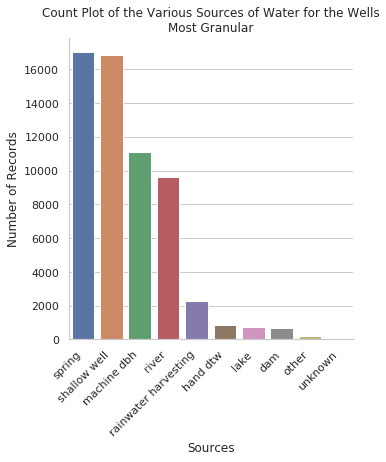

In [175]:
order = ["spring", 'shallow well', 'machine dbh', 'river', 'rainwater harvesting', 'hand dtw', 'lake', 'dam', 'other', 'unknown']
sns.catplot(x = 'source', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Count Plot of the Various Sources of Water for the Wells\nMost Granular")
plt.xlabel("Sources")
plt.ylabel("Number of Records")

**`source_type`**

In [95]:
X_train['source_type'].describe()

count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object

Text(-10.824999999999996, 0.5, 'Number of Records')

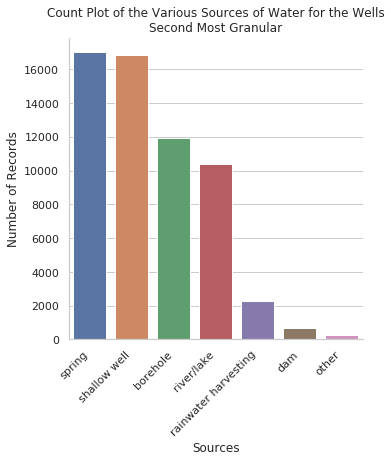

In [176]:
order = ["spring", "shallow well", "borehole", "river/lake", "rainwater harvesting", "dam", "other"]
sns.catplot(x = 'source_type', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Count Plot of the Various Sources of Water for the Wells\nSecond Most Granular")
plt.xlabel("Sources")
plt.ylabel("Number of Records")

**`source_class`**

In [97]:
X_train['source_class'].describe()

count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object

Text(-10.824999999999996, 0.5, 'Number of Records')

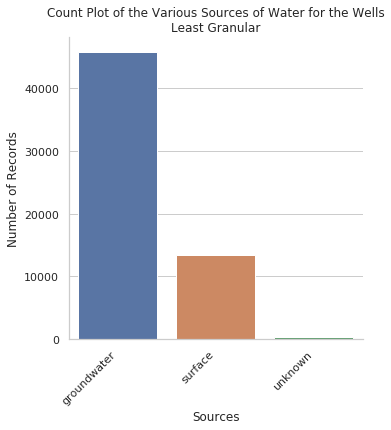

In [177]:
sns.catplot(x = 'source_class', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Count Plot of the Various Sources of Water for the Wells\nLeast Granular")
plt.xlabel("Sources")
plt.ylabel("Number of Records")

In [179]:
print("The source class is unknown for {} observations".format(X_train[X_train['source_class'] == "unknown"].shape[0]))

The source class is unknown for 278 observations


In [246]:
most_freq_ward = X_train["source_class"].groupby(X_train['ward']).describe()
most_freq_lga = X_train["source_class"].groupby(X_train['lga']).describe()

In [247]:
most_freq_ward.loc["Moa"]

count          25
unique          2
top       unknown
freq           19
Name: Moa, dtype: object

In [250]:
X_train[X_train['ward'] == "Moa"]['source_class']

5            unknown
1809     groundwater
10226        unknown
13049        unknown
17564        unknown
19054    groundwater
23566        unknown
23619        unknown
24977        unknown
28904    groundwater
28927    groundwater
31466        unknown
34052        unknown
34578    groundwater
35856        unknown
38528        unknown
39904        unknown
40340        unknown
42231        unknown
46525        unknown
49857        unknown
49940        unknown
54986    groundwater
57668        unknown
58891        unknown
Name: source_class, dtype: object

In [ ]:
most_freq_ward[df_tmp.iloc[i, df_tmp.columns.get_loc('ward')]]['top']

In [207]:
for i in range(len(most_freq)):
    if most_freq[i] == "unknown":
        print(most_freq[i])

In [249]:
df_tmp = X_train[X_train["source_class"] == 'unknown'].copy()
for i in range(df_tmp.shape[0]):
    if most_freq_ward.loc[df_tmp.iloc[i, df_tmp.columns.get_loc('ward')]]['top'] == "unknown":
        df_tmp.iloc[i, df_tmp.columns.get_loc('source_class')] = most_freq_lga.loc[df_tmp.iloc[i, df_tmp.columns.get_loc('lga')]]['top']
    else:    
        df_tmp.iloc[i, df_tmp.columns.get_loc('source_class')] = most_freq_ward.loc[df_tmp.iloc[i, df_tmp.columns.get_loc('ward')]]['top']
df_tmp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,groundwater,communal standpipe multiple,communal standpipe
277,65530,0.0,2011-03-13,British Colonial Government,0,DWE,39.110137,-4.754611e+00,Magaoni,0,Pangani,Magaoni,Tanga,4,8,Mkinga,Duga,1,True,GeoData Consultants Ltd,VWC,Deep well,True,1961,other,other,other,vwc,user-group,never pay,never pay,salty abandoned,salty,dry,dry,other,other,surface,other,other
323,51403,0.0,2013-02-16,Dwsp,0,DWE,0.000000,-2.000000e-08,Serengeti,0,Lake Victoria,Madukani,Mwanza,17,1,Magu,Nkungulu,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,other,other,groundwater,other,other
820,37114,0.0,2011-03-15,Mkinga Distric Coun,0,DWE,38.811746,-4.824019e+00,none,32,Pangani,Loko,Tanga,4,8,Mkinga,Maramba,50,True,GeoData Consultants Ltd,VWC,Magati gravity water,True,1982,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,other,other,groundwater,communal standpipe,communal standpipe
1155,3634,0.0,2011-03-15,Mkinga Distric Coun,0,DWE,38.811472,-4.824696e+00,none,32,Pangani,Loko,Tanga,4,8,Mkinga,Maramba,1,True,GeoData Consultants Ltd,VWC,Magati gravity water,True,1982,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,other,other,groundwater,communal standpipe,communal standpipe


I believe that the two least granular features will be the most useful for modeling. For the `source_class` I'll fill the unknowns using the most frequent level for the ward the wells are in.

#### Payment Features
These features descried how the well is paid for.

**`payment`**

In [99]:
X_train['payment'].describe()

count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

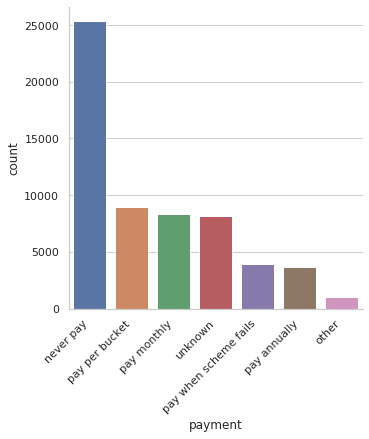

In [100]:
order = ['never pay', 'pay per bucket', 'pay monthly', 'unknown', 'pay when scheme fails', 'pay annually', 'other']
sns.catplot(x = 'payment', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

**`payment_type`**

In [260]:
X_train['payment_type'].describe()

count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

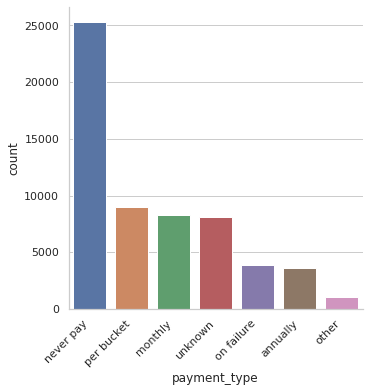

In [259]:
order = ['never pay', 'per bucket', 'monthly', 'unknown', 'on failure', 'annually', 'other']
sns.catplot(x = 'payment_type', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

This feature seems to show the exact same information as the `payment` feature, just with slightly different names. I'll be dropping it from the modeling data set, since it's redundant.

#### Quality Features
These features describe the quality of the water the well provides.

**`water_quality`**

In [261]:
X_train['water_quality'].describe()

count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

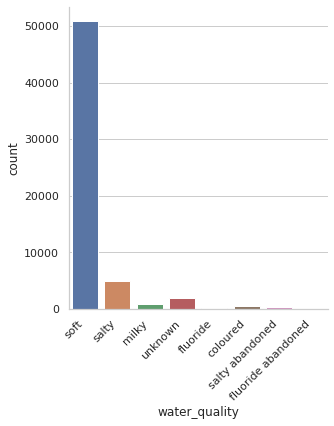

In [263]:
sns.catplot(x = 'water_quality', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

**`quality_group`**

In [262]:
X_train['quality_group'].describe()

count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

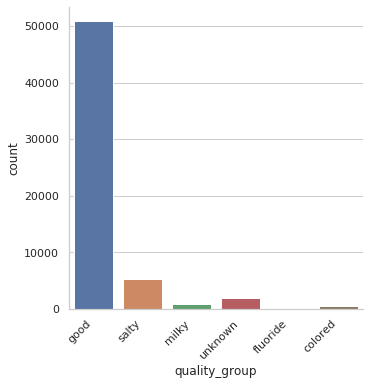

In [264]:
sns.catplot(x = 'quality_group', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

The above two features seem to describe incredibly similar information. I'll only retain quality_group in the modeling data set.

#### Quantity Features
These features describe the quantity of water provided by the well.

**`quantity`**

In [265]:
X_train['quantity'].describe()

count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

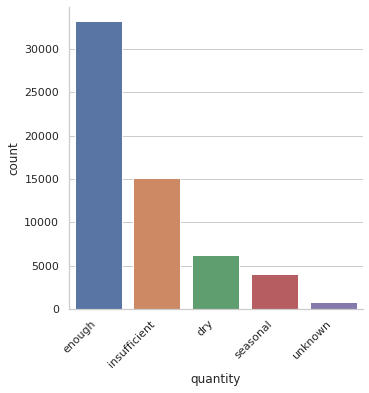

In [267]:
sns.catplot(x = 'quantity', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

**`quantity_group`**

In [266]:
X_train['quantity_group'].describe()

count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

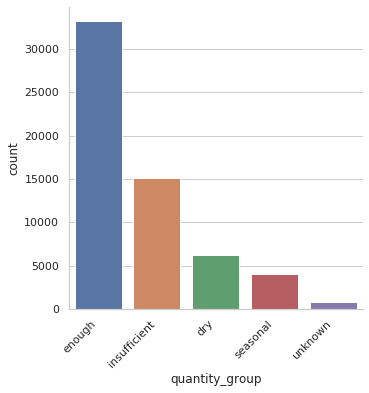

In [268]:
sns.catplot(x = 'quantity_group', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

As the above to features capture the same information, I'll only be retaining `quantity` in the modeling data set.

#### Waterpoint Type Features
These features describe the type of waterpoint.

**`waterpoint_type`**

In [269]:
X_train['waterpoint_type'].describe()

count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

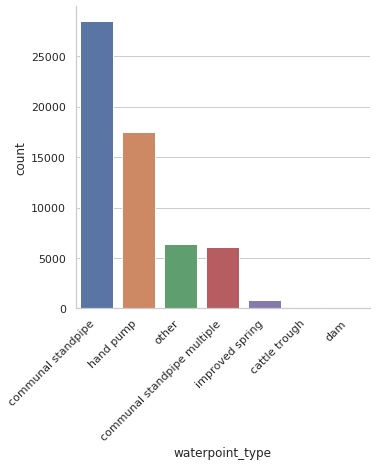

In [274]:
order = ["communal standpipe", "hand pump", "other", "communal standpipe multiple", "improved spring", "cattle trough", "dam"]
sns.catplot(x = 'waterpoint_type', kind = 'count', data = X_train, order = order)
plt.xticks(rotation = 45, ha = 'right')

**`waterpoint_type_group`**

In [270]:
X_train['waterpoint_type_group'].describe()

count                  59400
unique                     6
top       communal standpipe
freq                   34625
Name: waterpoint_type_group, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

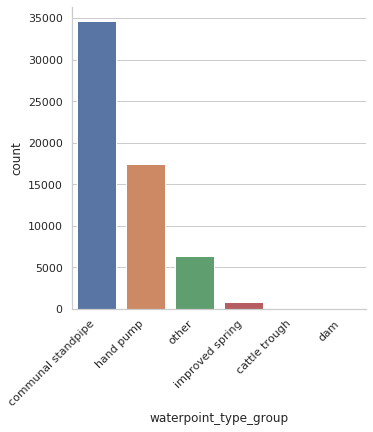

In [275]:
order = ["communal standpipe", "hand pump", "other", "improved spring", "cattle trough", "dam"]
sns.catplot(x = 'waterpoint_type_group', kind = 'count', data = X_train)
plt.xticks(rotation = 45, ha = 'right')

The above to features capture much of the same information. I'll only retain `waterpoint_type` in the modeling data set.

### Comments on Missing Data and Handling

There are 7 features in the training set for which we have missing values. These are, 
+ funder - Who funded the well
+ installer - Who installed the well
+ subvillage - Name of the village in which the well is located
+ public_meeting - The information on this feature that I have is just that it is True/False. I assume that this marks whether the well is used as or located at a public meeting place in the subvillage.
+ scheme_management - Who operates the waterpoint. IE The type of management system/board set up for the water point
+ scheme-name - The name of the presiding system/board managing the waterpoint
+ permit - True/False is the waterpoint permitted (IE does it have a  permit, not "is it allowable")


From the heatmap above, it seems that the missing values for `funder` and `installer` tend to occur together. Let's review this interaction a little more: 

In [101]:
X_train.shape[0] - (X_train['funder'].isna() == X_train['installer'].isna()).sum()

126

## Reviewing the Testing Set

In [102]:
X_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [276]:
X_test.shape

(14850, 40)

In [277]:
X_test.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [284]:
X_test[X_test == 0].describe().loc["count",:]

id                       0.0
amount_tsh           10410.0
gps_height            5211.0
longitude              457.0
latitude                 0.0
num_private          14656.0
region_code              0.0
district_code            4.0
population            5453.0
construction_year     5260.0
Name: count, dtype: float64

## References  

This cell contains the markdown code for all the referential links used in this notebook. Edit the cell to review the links as a list.

[1]: https://en.wikipedia.org/wiki/Subdivisions_of_Tanzania "Wikipedia article on the Subdivisons of Tanzania"


